1. Klasifikasi Gambar dengan Dataset CIFAR-10

* Deskripsi: Gunakan dataset CIFAR-10 yang terdiri dari 60.000 gambar dalam 10 kategori berbeda (seperti pesawat, mobil, burung, dll). Proyek ini akan menguji kemampuan Anda dalam menggunakan CNN untuk klasifikasi gambar.
* Tujuan: Memahami dasar-dasar CNN dan proses klasifikasi gambar dalam masalah yang lebih sederhana.

Referensi: CIFAR-10 Dataset

In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!kaggle datasets download -d [username/datasetname]

403 - Forbidden - Permission 'datasets.get' was denied


In [4]:
import zipfile

with zipfile.ZipFile("cifar10-python.zip", "r") as zip_ref:
    zip_ref.extractall("cifar10")

In [5]:
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
    return datadict

def load_cifar10(data_dir):
    batch_files = [f'data_batch_{i+1}' for i in range(5)]
    data = []
    labels = []

    for batch_file in batch_files:
        batch = load_cifar_batch(os.path.join(data_dir, 'cifar-10-batches-py', batch_file))
        data.append(batch[b'data'])
        labels.append(batch[b'labels'])

    data = np.concatenate(data)
    labels = np.concatenate(labels)

    test_batch = load_cifar_batch(os.path.join(data_dir, 'cifar-10-batches-py', 'test_batch'))
    test_data = test_batch[b'data']
    test_labels = test_batch[b'labels']

    return data, labels, test_data, test_labels

data_dir = r'File_Name'

train_data, train_labels, test_data, test_labels = load_cifar10(data_dir)

train_data = train_data.reshape(-1, 32, 32, 3)
test_data = test_data.reshape(-1, 32, 32, 3)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
test_labels = to_categorical(test_labels, 10)

print('Data pelatihan:', x_train.shape)
print('Data validasi:', x_val.shape)
print('Data pengujian:', test_data.shape)



Data pelatihan: (40000, 32, 32, 3)
Data validasi: (10000, 32, 32, 3)
Data pengujian: (10000, 32, 32, 3)


In [6]:
import os
os.listdir('cifar10/cifar-10-batches-py')

['batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'readme.html',
 'test_batch']

In [7]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_resized = np.array([cv2.resize(img, (64, 64)) for img in x_train])
val_data_resized = np.array([cv2.resize(img, (64, 64)) for img in x_val])
test_data_resized = np.array([cv2.resize(img, (64, 64)) for img in test_data])

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1.0/255
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow(train_data_resized, y_train, batch_size=64)
val_generator = val_datagen.flow(val_data_resized, y_val, batch_size=64)
test_generator = test_datagen.flow(test_data_resized, test_labels, batch_size=64)

Epoch 1/30
625/625 [==============================] - 86s 135ms/step - loss: 2.0527 - accuracy: 0.3210 - val_loss: 3.0725 - val_accuracy: 0.2590 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 84s 134ms/step - loss: 1.6924 - accuracy: 0.4307 - val_loss: 2.4411 - val_accuracy: 0.3697 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 85s 137ms/step - loss: 1.5330 - accuracy: 0.4825 - val_loss: 1.6779 - val_accuracy: 0.4536 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 85s 135ms/step - loss: 1.4334 - accuracy: 0.5146 - val_loss: 2.1985 - val_accuracy: 0.4085 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 84s 134ms/step - loss: 1.3699 - accuracy: 0.5365 - val_loss: 1.9589 - val_accuracy: 0.4191 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 87s 139ms/step - loss: 1.3162 - accuracy: 0.5564 - val_loss: 1.3748 - val_accuracy: 0.5303 - lr: 0.0010
Epoch 7/30
625/625 [==============================] 

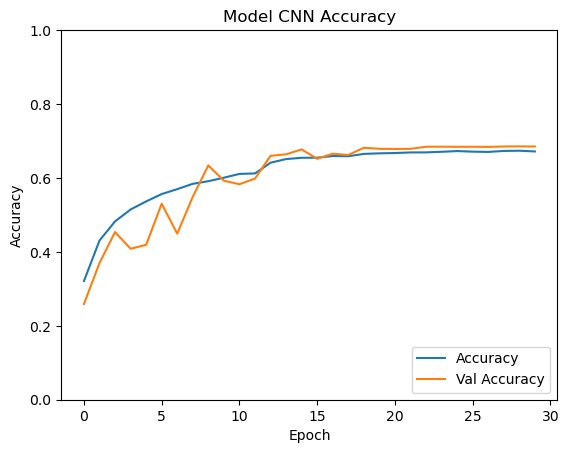

In [10]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

# Membangun model CNN
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(512, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# Melatih model dan menyimpan history
history_cnn = model_cnn.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[reduce_lr])

# Menampilkan ringkasan model
model_cnn.summary()

# Mengevaluasi model pada data pengujian
test_loss, test_acc = model_cnn.evaluate(test_generator)
print(f'Accuracy pada data pengujian: {test_acc * 100:.2f}%')

# Plot grafik akurasi dan akurasi validasi
plt.plot(history_cnn.history['accuracy'], label='Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model CNN Accuracy')
plt.show()

In [14]:
model_cnn.save('cifar10_cnn_model3.h5')

C:\Users\aryag\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
from tensorflow.keras.models import load_model

model_cnn = load_model('cifar10_cnn_model3.h5')

# Mengevaluasi model pada data pengujian
test_loss, test_acc = model_cnn.evaluate(test_generator)
print(f'Accuracy pada data pengujian: {test_acc * 100:.2f}%')

157/157 [==============================] - 11s 64ms/step - loss: 0.9910 - accuracy: 0.6785
Accuracy pada data pengujian: 67.85%


313/313 [==============================] - 80s 223ms/step


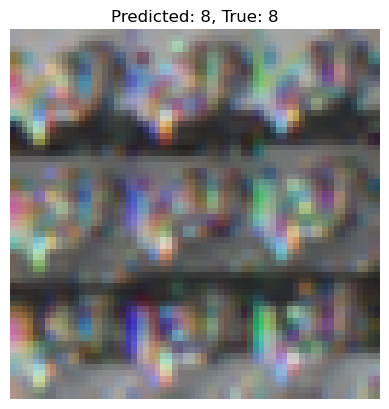

In [16]:
predictions = model.predict(test_data_resized)

# Get the predicted label and the true label of the first test image
predicted_label = np.argmax(predictions[1])
true_label = np.argmax(test_labels[1])

# Display the first test image and its prediction
plt.imshow(test_data_resized[0])
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan beberapa gambar dan prediksi
for i in range(5):
    plt.imshow(test_data[i])
    plt.title(f"Prediksi: {np.argmax(predictions[i])}, Label Asli: {np.argmax(test_labels[i])}")
    plt.show()

In [ ]:
# Mengambil gambar pertama dari data pengujian
image = test_data[0]
plt.imshow(image)
plt.show()

# Melakukan prediksi
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

# Menampilkan label yang diprediksi
print("Predicted label:", predicted_label)


- Pesawat (airplane) 0
- Mobil (automobile) 1
- Burung (bird)      2
- Kucing (cat) 3
- Rusa (deer) 4
- Anjing (dog) 5
- Katak (frog) 6
- Kuda (horse) 7
- Kapal (ship) 8
- Truk (truck) 9